In [18]:
from rocketpy import Environment, SolidMotor, Rocket, Flight, MonteCarlo, Function
from rocketpy.stochastic import (
    StochasticEnvironment,
    StochasticSolidMotor,
    StochasticRocket,
    StochasticFlight,
    StochasticNoseCone,
    StochasticTail,
    StochasticTrapezoidalFins,
    StochasticParachute,
    StochasticRailButtons,
)

import numpy as np
from numpy.random import normal, choice
from IPython.display import display

%config InlineBackend.figure_formats = ['svg']
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.rcParams["figure.figsize"] = [8, 5]
mpl.rcParams["figure.dpi"] = 120
mpl.rcParams["font.size"] = 14
mpl.rcParams["legend.fontsize"] = 14
mpl.rcParams["figure.titlesize"] = 14

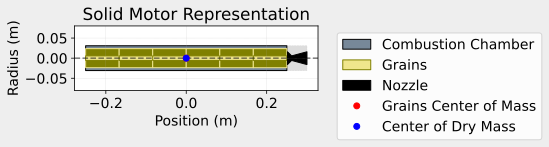

Nozzle Details
Nozzle Radius: 0.01588 m
Nozzle Throat Radius: 0.00565 m

Grain Details
Number of Grains: 6
Grain Spacing: 0 m
Grain Density: 1479.307 kg/m3
Grain Outer Radius: 0.0237 m
Grain Inner Radius: 0.00565 m
Grain Height: 0.0834 m
Grain Volume: 0.000 m3
Grain Mass: 0.205 kg

Motor Details
Total Burning Time: 4.1 s
Total Propellant Mass: 1.232 kg
Structural Mass Ratio: 0.402
Average Propellant Exhaust Velocity: 1851.818 m/s
Average Thrust: 556.449 N
Maximum Thrust: 915.996 N at 0.057 s after ignition.
Total Impulse: 2281.440 Ns



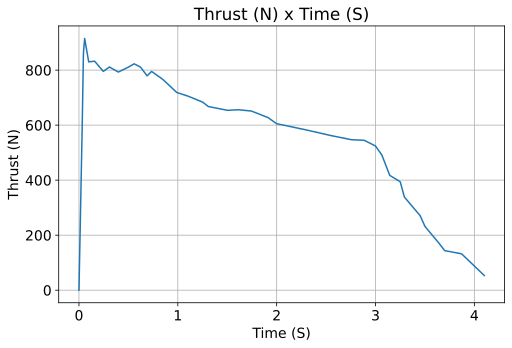

In [19]:
K480 = SolidMotor(
    thrust_source="AeroTech_K480W.csv",
    dry_mass=0.827,
    dry_inertia=(.001483,.001483,.000578),
    nozzle_radius=.01588,
    grain_number=6,
    grain_density=1479.307,
    grain_outer_radius=.0237,
    grain_initial_inner_radius=.00565,
    grain_initial_height=.0834,
    grain_separation=0,
    grains_center_of_mass_position=0,
    center_of_dry_mass_position=0,
    nozzle_position=.2502 + .05,
    burn_time=4.1,
    throat_radius=.00565,
    coordinate_system_orientation="combustion_chamber_to_nozzle",
)
K480.draw()
K480.info()

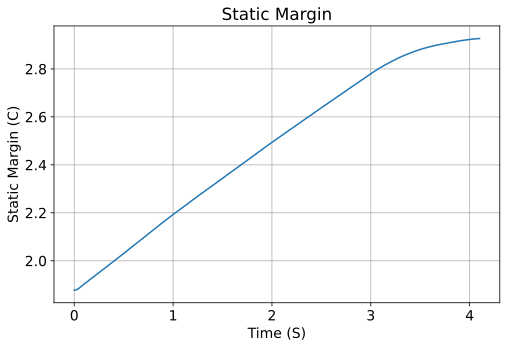

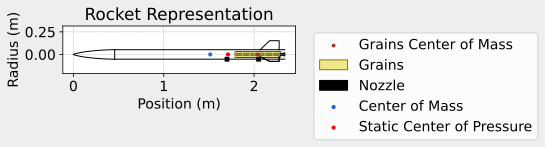

In [20]:
OneL = Rocket (
    mass = 5.049,
    radius = .0525,
    inertia = (2.21, 2.21, .00696),
    coordinate_system_orientation = "nose_to_tail",
    center_of_mass_without_motor = 1.30,
    power_off_drag = "./CDOFF.csv",
    power_on_drag = "./CDON.csv"
)

nose_cone = OneL.add_nose(length = .457, kind = "lvhaack", position = 0)
fin_set = OneL.add_trapezoidal_fins(n=3, root_chord=.21, tip_chord=.105, span=.1, position=2.0673, cant_angle=0)
OneL.add_motor(K480, 2.29-.2502)
rail_buttons = OneL.set_rail_buttons(upper_button_position=1.70, lower_button_position=2.05, angular_position=180)
Main = OneL.add_parachute("Main", cd_s=.97, trigger="apogee",)
OneL.plots.static_margin()
OneL.plots.draw()


Gravity Details

Acceleration of gravity at surface level:    9.7913 m/s²
Acceleration of gravity at  31.128 km (ASL): 9.7003 m/s²


Launch Site Details

Launch Date: 2024-12-28 12:00:00 UTC
Launch Site Latitude: 32.99025°
Launch Site Longitude: -106.97500°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 315468.64 W    3651938.65 N
Launch Site UTM zone: 13S
Launch Site Surface Elevation: 1400.0 m


Atmospheric Model Details

Atmospheric Model Type: Ensemble
Ensemble Maximum Height: 31.128 km
Ensemble Time Period: from 2024-12-27 06:00:00 to 2025-01-12 06:00:00 utc
Ensemble Hour Interval: 6 hrs
Ensemble Latitude Range: From -90.0° to 90.0°
Ensemble Longitude Range: From 0.0° to 359.5°
Number of Ensemble Members: 31
Selected Ensemble Member: 0 (Starts from 0)


Surface Atmospheric Conditions

Surface Wind Speed: 2.50 m/s
Surface Wind Direction: 244.94°
Surface Wind Heading: 64.94°
Surface Pressure: 860.01 hPa
Surface Temperature: 281.62 K
Surface Air Density: 1.064 kg/m³
Surfac

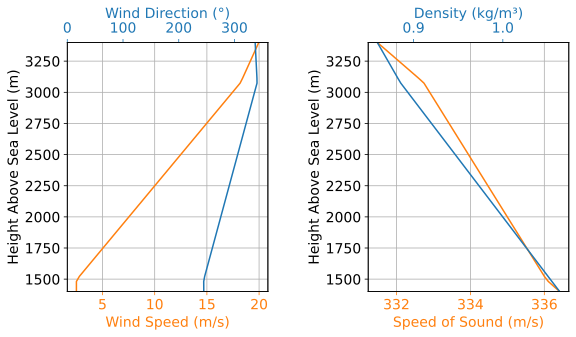


Initial Conditions

Initial time: 0.000 s
Position - x: 0.00 m | y: 0.00 m | z: 1400.00 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude (quaternions) - e0: 0.000 | e1: -0.000 | e2: -0.044 | e3: -0.999
Euler Angles - Spin φ : -180.00° | Nutation θ: -5.00° | Precession ψ: 0.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s | ω3: 0.00 rad/s
Initial Stability Margin: 1.877 c


Surface Wind Conditions

Frontal Surface Wind Speed: 1.06 m/s
Lateral Surface Wind Speed: -2.27 m/s


Launch Rail

Launch Rail Length: 5 m
Launch Rail Inclination: 85.00°
Launch Rail Heading: 0.00°


Rail Departure State

Rail Departure Time: 0.307 s
Rail Departure Velocity: 30.407 m/s
Rail Departure Stability Margin: 1.971 c
Rail Departure Angle of Attack: 4.717°
Rail Departure Thrust-Weight Ratio: 11.855
Rail Departure Reynolds Number: 1.932e+05


Burn out State

Burn out time: 4.100 s
Altitude at burn out: 2110.814 m (ASL) | 710.814 m (AGL)
Rocket speed at burn out: 265.538 m/s
Freestream ve

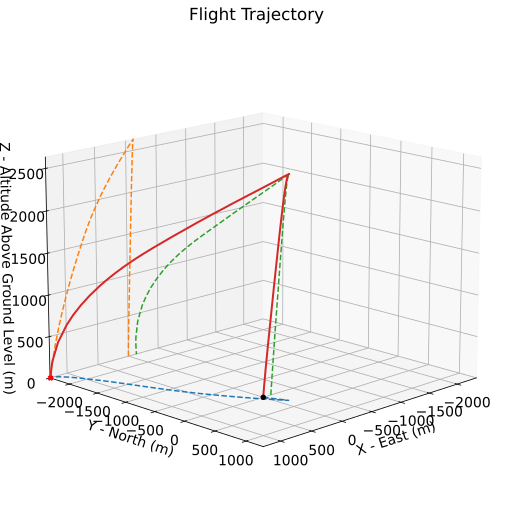



Trajectory Kinematic Plots



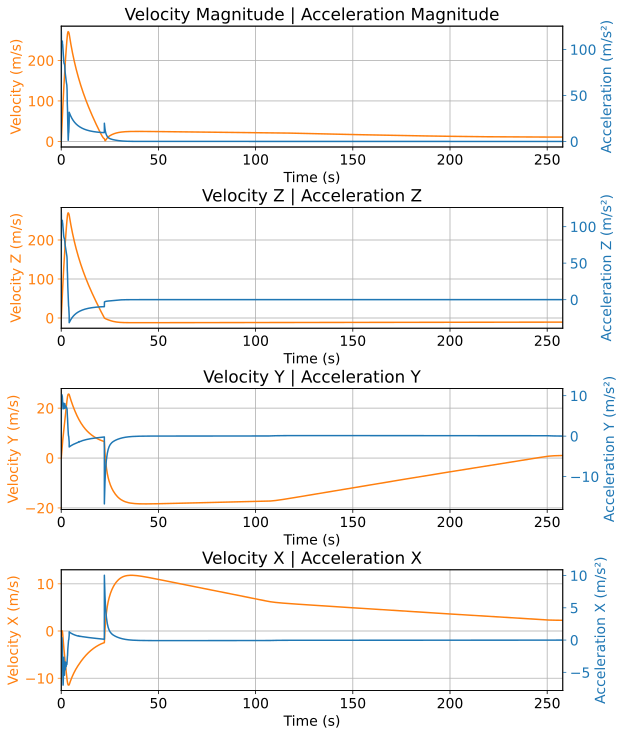



Angular Position Plots



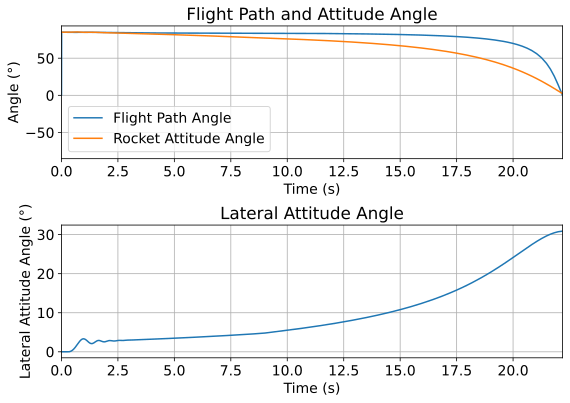



Path, Attitude and Lateral Attitude Angle plots



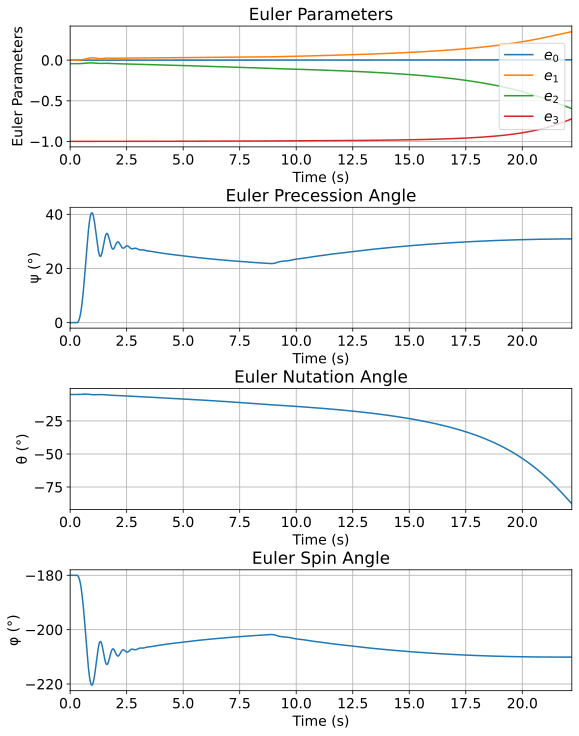



Trajectory Angular Velocity and Acceleration Plots



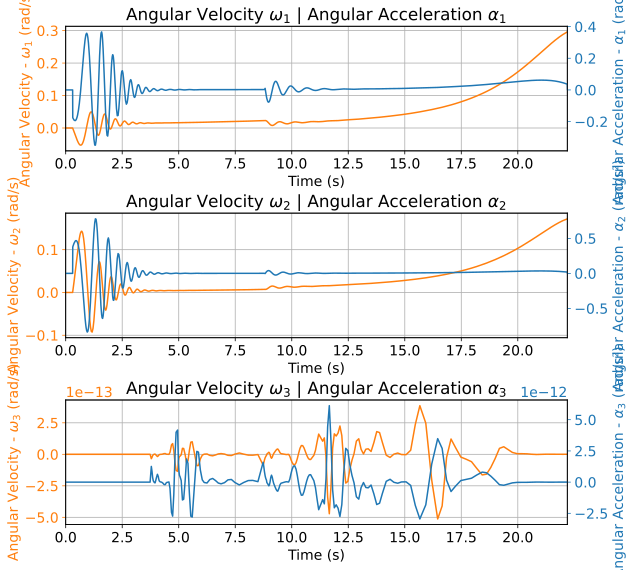



Aerodynamic Forces Plots



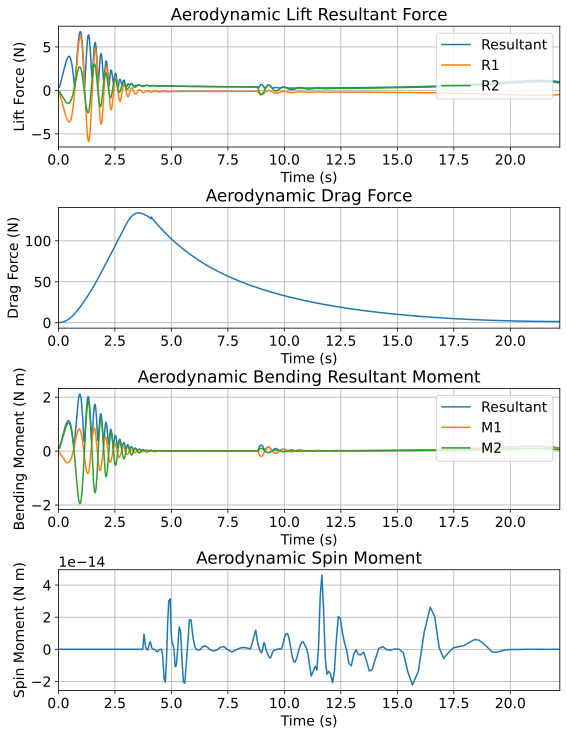



Rail Buttons Forces Plots



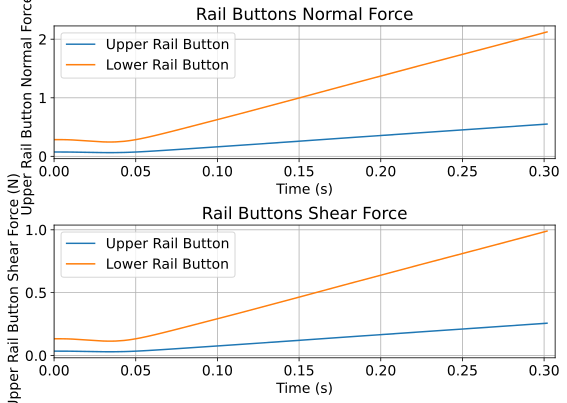



Trajectory Energy Plots



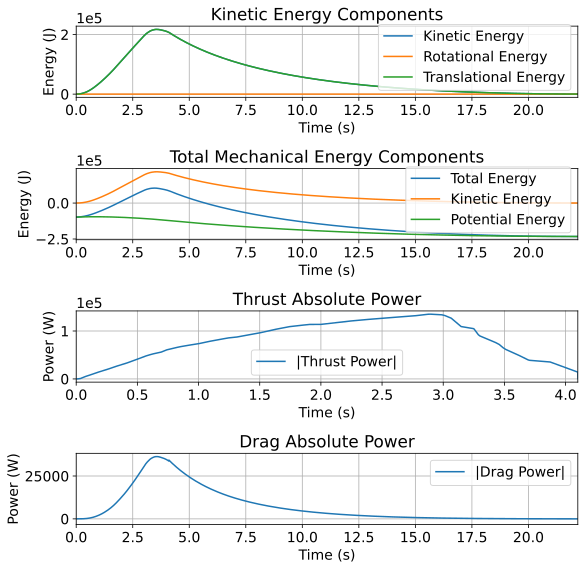



Trajectory Fluid Mechanics Plots



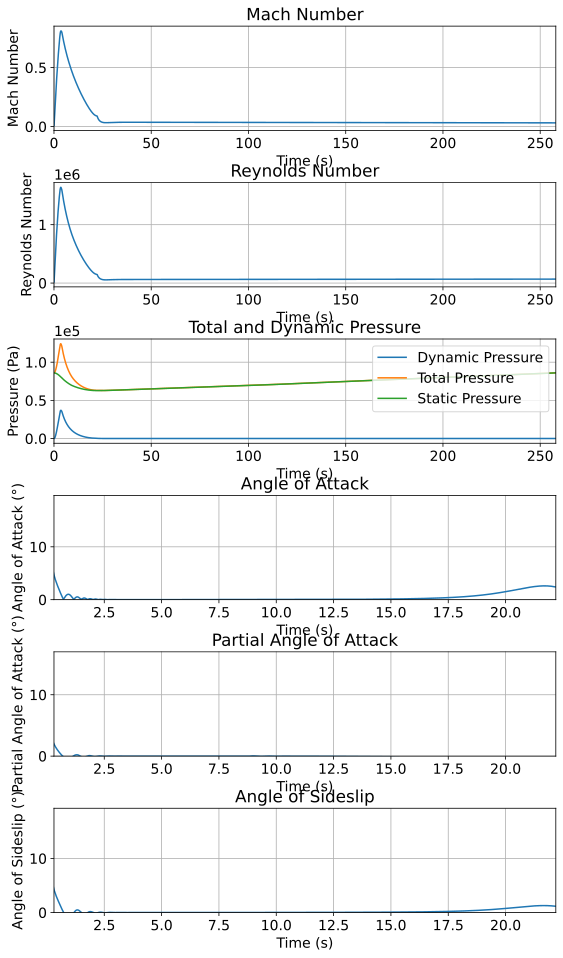



Trajectory Stability and Control Plots



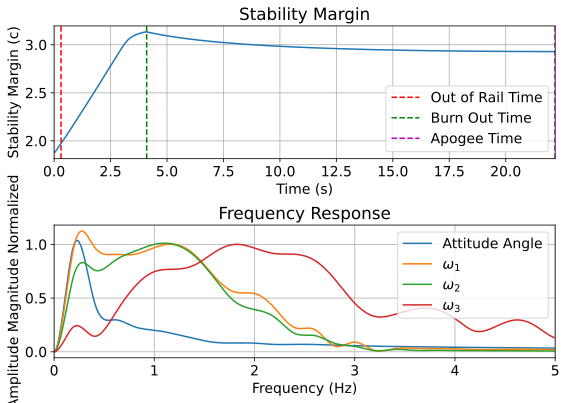



Rocket and Parachute Pressure Plots



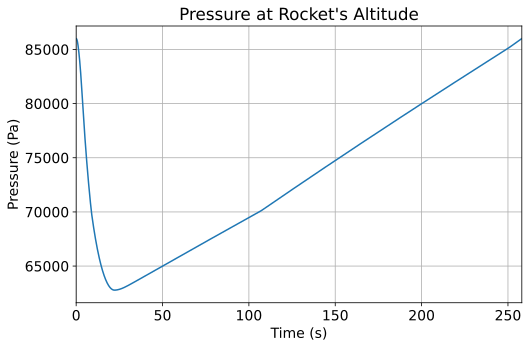


Parachute:  Main


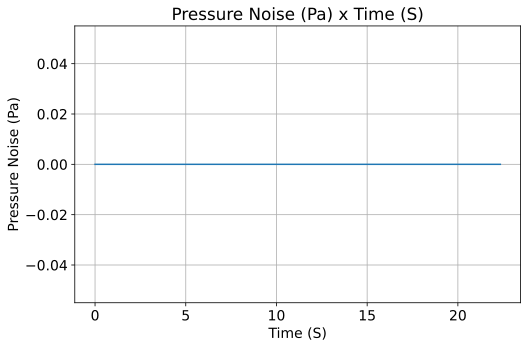

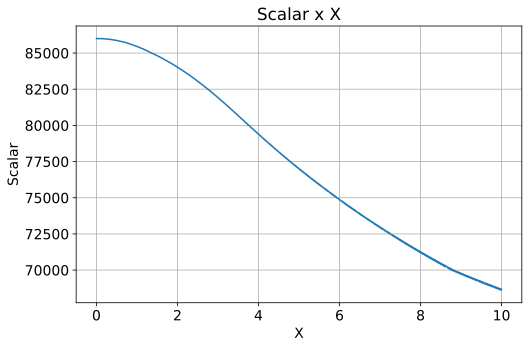

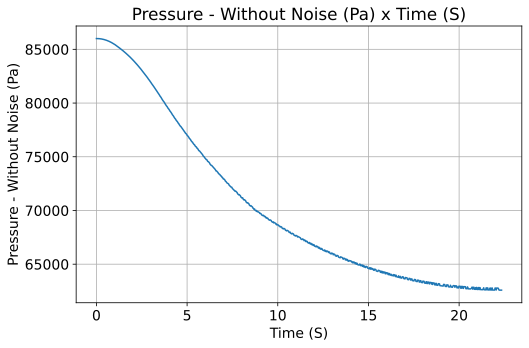

In [24]:
env = Environment(latitude=32.990254, longitude=-106.974998, elevation=1400)

import datetime

tomorrow = datetime.date.today() + datetime.timedelta(days=1)

env.set_date(
    (tomorrow.year, tomorrow.month, tomorrow.day, 12)
)  # Hour given in UTC time

env.max_expected_height=3400

env.set_atmospheric_model(
    type="Ensemble",
    file="GEFS"
)

test_flight = Flight(
    rocket=OneL, 
    environment=env, 
    rail_length=5, 
    inclination=85, 
    heading=0
    )

env.info()

test_flight.all_info()


In [25]:
stochastic_env = StochasticEnvironment(
    environment=env,
    ensemble_member=list(range(env.num_ensemble_members)),
)

wind_speed_at_1000m = []
for i in range(5):
    rnd_env = stochastic_env.create_object()
    wind_speed_at_1000m.append(rnd_env.wind_velocity_x(1000))

print(wind_speed_at_1000m)

stochastic_motor = StochasticSolidMotor(
    solid_motor=K480,
    burn_start_time=(0, 0.1, "binomial"),
    grains_center_of_mass_position=(0, .001, "normal"),
    grain_density=(1479.307, 1.479, "normal"),
    grain_separation=(0, .001, "normal"),
    grain_initial_height=(.0834, .001, "normal"),
    grain_initial_inner_radius=(.00565, .00375, "normal"),
    grain_outer_radius=(.0237, .00375, "normal"),
    total_impulse=(6500, 6.5),
    throat_radius=(.00565, .0005, "normal"),
    nozzle_radius=(.01588, .0005, "normal"),
    nozzle_position=(.2502+.05, .001, "normal"),
)

total_impulse = []
for i in range(5):
    rnd_motor = stochastic_motor.create_object()
    total_impulse.append(rnd_motor.total_impulse)

print(total_impulse)

stochastic_rocket = StochasticRocket(
    rocket=OneL,
    radius=(.0525, (.0127/2000), "normal"),
    mass=(15.426, 0.5, "normal"),
    inertia_11=(6.321, 0),
    inertia_22=0.01,
    inertia_33=0.01,
    center_of_mass_without_motor=0,
)

stochastic_nose_cone = StochasticNoseCone(
    nosecone=nose_cone,
    length=(.457, .001, "normal"),
)

stochastic_fin_set = StochasticTrapezoidalFins(
    trapezoidal_fins=fin_set,
    root_chord=(.21, .0005, "normal"),
    tip_chord=(.105, .0005, "normal"),
    span=(.1, .0005, "normal"),
)

stochastic_rail_buttons = StochasticRailButtons(
    rail_buttons=rail_buttons, buttons_distance=0.001
)

stochastic_main = StochasticParachute(
    parachute=Main,
    cd_s=(.97, .007, "normal"),
)

stochastic_rocket.add_motor(stochastic_motor, position=0.001)
stochastic_rocket.add_nose(stochastic_nose_cone, position=(0, 0.001))
stochastic_rocket.add_trapezoidal_fins(stochastic_fin_set, position=(0.001, "normal"))
stochastic_rocket.set_rail_buttons(
    stochastic_rail_buttons, lower_button_position=(0.001, "normal")
)
stochastic_rocket.add_parachute(stochastic_main)

stochastic_flight = StochasticFlight(
    flight=test_flight,
    inclination=(84.7, .5),  # mean= 84.7, std=1
    heading=(0, 2),  # mean= 53, std=2
)

stochastic_env.visualize_attributes()
stochastic_motor.visualize_attributes()
stochastic_rocket.visualize_attributes()
stochastic_flight.visualize_attributes()

[np.float64(2.6046655615376526), np.float64(2.005016263758981), np.float64(2.6046655615376526), np.float64(2.752093703952874), np.float64(2.273200080160785)]
[np.float64(6504.3277611089015), np.float64(6503.537563339128), np.float64(6503.593530703655), np.float64(6492.751320337816), np.float64(6496.593222111524)]
Reporting the attributes of the `StochasticEnvironment` object:

Constant Attributes:
	datum                    SIRGAS2000
	elevation                1400
	gravity                  Function from R1 to R1 : (height (m)) → (gravity (m/s²))
	latitude                 32.990254
	longitude                -106.974998
	timezone                 UTC

Stochastic Attributes:
	wind_velocity_x_factor   1.00000 ± 0.00000 (normal)
	wind_velocity_y_factor   1.00000 ± 0.00000 (normal)

Stochastic Attributes with choice of values:
	ensemble_member [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
Reporting the attributes of the `Sto

The following input file was imported: montec_analysis_outputs.inputs.txt
A total of 0 simulations results were loaded from the following output file: montec_analysis_outputs.outputs.txt

The following error file was imported: montec_analysis_outputs.errors.txt
Completed 10 iterations. Total CPU time: 4.0 s. Total wall time: 4.1 smated time left: 0 s
Saving results.    
Results saved to montec_analysis_outputs.outputs.txt
Monte Carlo Simulation by RocketPy
Data Source:  montec_analysis_outputs
Number of simulations:  10
Results: 

                Parameter            Mean       Std. Dev.
------------------------------------------------------------
          max_mach_number           0.989           0.024
                 apogee_y         957.233          67.435
         out_of_rail_time           0.260           0.004
     out_of_rail_velocity          35.887           0.645
     frontal_surface_wind          -2.944           0.394
                 y_impact       -2821.209         390.

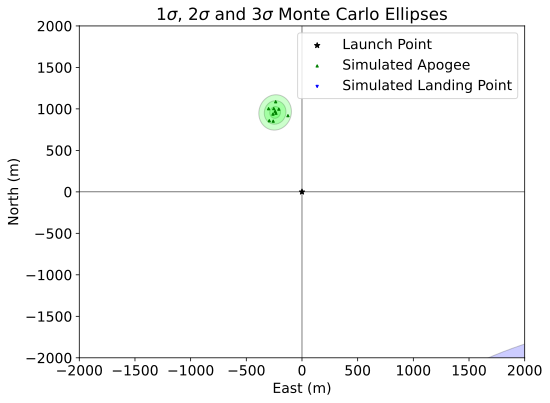

In [30]:
test_dispersion = MonteCarlo(
    filename="montec_analysis_outputs",
    environment=stochastic_env,
    rocket=stochastic_rocket,
    flight=stochastic_flight,
)

test_dispersion.simulate(number_of_simulations=10, append=False)

test_dispersion.prints.all()
test_dispersion.plots.ellipses(xlim=(-2000, 2000), ylim=(-2000, 2000))